In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import mlflow
import autosklearn.regression
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics
from sklearn.model_selection import train_test_split
path = 'SAMPLE_DATA_SET.xlsx'

# Read and load dataset
df= pd.read_excel(path, sheet_name=[0, 1])

In [15]:
X =df.get(0)
X = (X.iloc[:,1:]).values
X = X.T
print(X.shape)

(839, 444)


In [16]:
Y =df.get(1)
Y = (Y.iloc[:,:]).values
print(Y.shape)

(839, 2)


In [50]:

mlflow.set_experiment("AUTO Scikit-learn")
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000")

with mlflow.start_run(run_name="Auto Sklearn 0.3 rip"):

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y[:, 0], test_size=0.3, random_state=42)
    automl = autosklearn.regression.AutoSklearnRegressor()
    automl.fit(X_train, Y_train)
    y_hat = automl.predict(X_test)
    mlflow.log_param('MSE', mean_squared_error(Y_test, test_predictions))


2024/05/29 21:49:42 INFO mlflow.tracking.fluent: Experiment with name 'AUTO Scikit-learn' does not exist. Creating a new experiment.


In [23]:
print(automl.leaderboard())

          rank  ensemble_weight            type      cost   duration
model_id                                                            
290          1             0.64      libsvm_svr  0.252381   0.342295
1039         2             0.08  ard_regression  0.279884   0.427476
963          3             0.08  ard_regression  0.280875   0.639595
1036         4             0.02  ard_regression  0.283949   0.393942
185          5             0.10     extra_trees  0.293412  11.728742
1054         6             0.08  ard_regression  0.296104   8.493919


In [29]:
%pprint
import pprint
automl.show_models()

Pretty printing has been turned ON


{185: {'model_id': 185,
  'rank': 1,
  'cost': 0.29341207373026046,
  'ensemble_weight': 0.1,
  'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x7ce77654d9c0>,
  'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice at 0x7ce77654e170>,
  'regressor': <autosklearn.pipeline.components.regression.RegressorChoice at 0x7ce775f883a0>,
  'sklearn_regressor': ExtraTreesRegressor(criterion='mae', max_features=0.8905571679380339,
                      min_samples_split=12, n_estimators=512, n_jobs=1,
                      random_state=1, warm_start=True)},
 290: {'model_id': 290,
  'rank': 2,
  'cost': 0.2523806607757564,
  'ensemble_weight': 0.64,
  'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x7ce77654d960>,
  'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice at 0x7ce775cc6740>,
  're

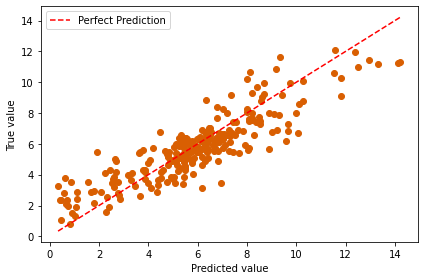

In [47]:
plt.scatter(Y_test,test_predictions, c="#d95f02")
plt.plot([min(Y_test), max(Y_test)],
                [min(Y_test), max(Y_test)], '--', c='red', label='Perfect Prediction')
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.tight_layout()
plt.show()